# Estudo de caso 2: Como uma empresa de tecnologia de bem-estar pode agir com inteligência?




### Sobre a companhia, os produtos e a tarefa de negócio

Bellabeat é uma empresa de alta tecnologia, que fabrica produtos inteligentes focados na saúde. Os produtos (dispositivos e aplicativo), trabalham no rastreamento de hábitos diários de seus usuários. Os fundadores da empresa, Urška Sršen e Sando Mur acreditam que a análise dos dados de outros dispositivos podem relevar insights e um norte para o marketing e desenvolvimento da empresa.

### Os produtos Bellabeat

A Bellabeat conta com os seguintes produtos:

* Aplicativo Bellabeat: O aplicativo Bellabeat fornece aos usuários dados de saúde relacionados à sua atividade, sono, estresse, ciclo menstrual e hábitos de atenção plena. Esses dados podem ajudar os usuários a entender melhor seus hábitos atuais e tomar decisões saudáveis. O aplicativo Bellabeat se conecta à sua linha de produtos inteligentes de bem-estar.
* Leaf: O rastreador de bem-estar clássico da Bellabeat pode ser usado como pulseira, colar ou clipe. O rastreador Leaf se conecta ao aplicativo Bellabeat para rastrear a atividade, o sono e o estresse.
* Time: Este relógio de bem-estar combina a aparência atemporal de um relógio clássico com tecnologia inteligente para rastrear a atividade, o sono e o estresse do usuário. O relógio Time se conecta ao aplicativo Bellabeat para fornecer informações sobre seu bem-estar diário.
* Spring: Esta é uma garrafa de água que rastreia a ingestão diária de água por meio de tecnologia inteligente para garantir que você esteja adequadamente hidratado ao longo do dia. A garrafa Spring se conecta ao aplicativo Bellabeat para rastrear seus níveis de hidratação.
* Planos da Bellabeat: A Bellabeat também oferece aos usuários diferentes planos de assinatura. As assinaturas oferecem aos usuários acesso 24 horas por dia, 7 dias por semana, orientação totalmente personalizada sobre nutrição, atividade, sono, saúde e beleza, além de atenção plena com base em seu estilo de vida e objetivos.

### A tarefa de negócio

Dessa forma a análise será feita a partir dos dados de outros diposisitvos semelhantes.A análise partirá das seguintes questões:

1. Quais são algumas das tendências no uso de dispositivos inteligentes?
2. Como essas tendências podem se aplicar aos clientes da Bellabeat?
3. Como essas tendências podem ajudar a influenciar a estratégia de marketing da Bellabeat?

Então nossa tarefa de negócio é: Identificar oportunidades de melhora dos dipositivos Bellabeat, e de marketing através das tendências no uso de dispositivos semelhantes. **Com a tarefa de negócios identificada e cumprindo o papel de Perguntar, a análise seguirá os seis passos de análise propostos no Curso Google Data Analytics, perguntar, preparar, processar, analisar, compartilhar e agir.**

## Preparar: começando a trabalhar os dados

Urška Sršen indicou usar dados públicos que exploram os hábitos diários dos usuários de dispositivos inteligentes. Ela o direciona a um conjunto de dados específico, os dados do rastreador de condicionamento FitBit disponíveis no Kaggle. Os dados são disponibilizados por Mobius, são de domínio público, e contém as estatisticas de uso de 30 usuários que consentiram com o registro de atividade física, sono, e frequência cardíaca.

Algumas observações são importantes:

* Os dados foram colhidos entre 03 e 05 de dezembro de 2016;
* Os dados cobrem somente cerca de 30 usuários, o que tende a ser uma amostra pequena;
* Os dados incluem estatisticas em nível diário, por hora, por minutos, e um para registro de peso e índice de massa corporal.

In [1]:
# O primeiro passo é importar as bibliotecas que serão utilizadas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Agora deve ser feita a importações dos dataframes que serão utilizados
# Em uma análise prévia dos arquivos, decidi usar as atividades diárias, calorias por hora, intensidade por hora, sono diário e peso. 

atividade_diaria = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
calorias = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
intensidade = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
sono = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
peso = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')


In [3]:
# É o momento de checar a estrura dos dados
atividade_diaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [4]:
atividade_diaria.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
calorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [6]:
calorias.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [7]:
intensidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [8]:
intensidade.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [9]:
sono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [10]:
sono.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [11]:
peso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


In [12]:
peso.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


Existe uma incosistência no formato das datas nos dataframes, em todos o tipo de dado da coluna é object e deveria ser datetime. 

## Processar: manipular e limpar os dados para análise

In [13]:
# A primeira etapa do tratamento dos dados será corrigir o formato das datas
atividade_diaria['ActivityDate'] = pd.to_datetime(atividade_diaria['ActivityDate'])
atividade_diaria.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [14]:
calorias['ActivityHour'] = pd.to_datetime(calorias['ActivityHour'])
calorias.head()

/tmp/ipykernel_18/894701249.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  calorias['ActivityHour'] = pd.to_datetime(calorias['ActivityHour'])


,Id,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


In [15]:
intensidade['ActivityHour'] = pd.to_datetime(intensidade['ActivityHour'])
intensidade.head()

/tmp/ipykernel_18/1943478971.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intensidade['ActivityHour'] = pd.to_datetime(intensidade['ActivityHour'])


,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,20,0.333333
1,1503960366,2016-04-12 01:00:00,8,0.133333
2,1503960366,2016-04-12 02:00:00,7,0.116667
3,1503960366,2016-04-12 03:00:00,0,0.000000
4,1503960366,2016-04-12 04:00:00,0,0.000000


In [16]:
sono['SleepDay'] = pd.to_datetime(sono['SleepDay'])
sono.head()

/tmp/ipykernel_18/1846492885.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sono['SleepDay'] = pd.to_datetime(sono['SleepDay'])


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [17]:
peso['Date'] = pd.to_datetime(peso['Date'])
peso.head()

/tmp/ipykernel_18/2705874256.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  peso['Date'] = pd.to_datetime(peso['Date'])


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [18]:
# Agora os Id's únicos
atividade_diaria['Id'].nunique()

33

In [19]:
calorias['Id'].nunique()

33

In [20]:
intensidade['Id'].nunique()

33

In [21]:
sono['Id'].nunique()

24

In [22]:
peso['Id'].nunique()

8

É possível tirar uma conclusão antes de prosseguir:

* Existe uma baixa adesão ao acompanhamento e registro de peso e índice de massa corporal (IMC). Não utilizaremos o dataframe peso a seguir, e aqui já temos a primeira recomendação, sugerir o acompanhamento de peso e traçar metas aos usuários para obtenção do IMC ideal.

## Analisar: buscar insights nos dados

Em seguida deve se buscar resumos sobre os dataframes, e alguns aspectos para busca relações entre os dados

In [23]:
# Vamos usar o describe() para ter resumos estatístico de todos os dataframes e fazer uma análise rápida

atividade_diaria.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862


In [24]:
intensidade.describe()

,Id,ActivityHour,TotalIntensity,AverageIntensity
count,2.209900e+04,22099,22099.000000,22099.000000
mean,4.848235e+09,2016-04-26 11:46:42.588352512,12.035341,0.200589
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000
25%,2.320127e+09,2016-04-19 01:00:00,0.000000,0.000000
50%,4.445115e+09,2016-04-26 06:00:00,3.000000,0.050000
75%,6.962181e+09,2016-05-03 19:00:00,16.000000,0.266667
max,8.877689e+09,2016-05-12 15:00:00,180.000000,3.000000
std,2.422500e+09,NaN,21.133110,0.352219


In [25]:
calorias.describe()

,Id,ActivityHour,Calories
count,2.209900e+04,22099,22099.000000
mean,4.848235e+09,2016-04-26 11:46:42.588352512,97.386760
min,1.503960e+09,2016-04-12 00:00:00,42.000000
25%,2.320127e+09,2016-04-19 01:00:00,63.000000
50%,4.445115e+09,2016-04-26 06:00:00,83.000000
75%,6.962181e+09,2016-05-03 19:00:00,108.000000
max,8.877689e+09,2016-05-12 15:00:00,948.000000
std,2.422500e+09,NaN,60.702622


In [26]:
sono.describe()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413,413.000000,413.000000,413.000000
mean,5.000979e+09,2016-04-26 12:40:05.811137792,1.118644,419.467312,458.639225
min,1.503960e+09,2016-04-12 00:00:00,1.000000,58.000000,61.000000
25%,3.977334e+09,2016-04-19 00:00:00,1.000000,361.000000,403.000000
50%,4.702922e+09,2016-04-27 00:00:00,1.000000,433.000000,463.000000
75%,6.962181e+09,2016-05-04 00:00:00,1.000000,490.000000,526.000000
max,8.792010e+09,2016-05-12 00:00:00,3.000000,796.000000,961.000000
std,2.060360e+09,NaN,0.345521,118.344679,127.101607


In [27]:
peso.describe()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,2016-04-27 15:39:54.283582208,72.035821,158.811801,23.50000,25.185224,1.461772e+12
min,1.503960e+09,2016-04-12 06:47:11,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,2016-04-19 15:19:45,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,2016-04-27 23:59:59,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,2016-05-04 15:24:10.500000,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,2016-05-12 23:59:59,133.500000,294.317120,25.00000,47.540001,1.463098e+12
std,1.950322e+09,NaN,13.923206,30.695415,2.12132,3.066963,7.829948e+08


### A partir dos resumos é possível tirar mais conclusões:

* Os usuários tem uma média diária de passos de 7638, o pesquisador espanhol Borja del Pozo Cruz em matéria à BBC indica que o ideal diário são 10000 passos somados a 30 minutos de atividade física de intensidade moderada, o que reduzirá chances de doenças como câncer, demência e cardiovasculares. Estimular os usuários a bater essa meta é um caminho;
* Os usuários tem altos períodos sedentários durante o dia, uma média de 16 horas. Além disso maioria deles tem atividade de baixa intensidade, o que indica a necessidade de uma mudança nesse aspecto;
* Os usuários tem uma média de sono próxima a ideal de acordo com a OMS, 7 horas (420 minutos);
* O ecossistema de produtos da Bellabeat pode oferecer um acompanhamento completo de 3 aspectos importantes da saúde: sono, hidratação e atividade física. O aplicativo deve funcionar como uma central de saúde e um companheiro no desenvolvimento dos usuários.

In [28]:
# Para analisar os horários de pico de atividade será necessário separar os horários da data em intensidade
intensidade['data'] = intensidade['ActivityHour'].dt.date
intensidade['hora'] = intensidade['ActivityHour'].dt.time
intensidade.head()


,Id,ActivityHour,TotalIntensity,AverageIntensity,data,hora
0,1503960366,2016-04-12 00:00:00,20,0.333333,2016-04-12,00:00:00
1,1503960366,2016-04-12 01:00:00,8,0.133333,2016-04-12,01:00:00
2,1503960366,2016-04-12 02:00:00,7,0.116667,2016-04-12,02:00:00
3,1503960366,2016-04-12 03:00:00,0,0.000000,2016-04-12,03:00:00
4,1503960366,2016-04-12 04:00:00,0,0.000000,2016-04-12,04:00:00


In [29]:
# Para criar algumas visualizações será necessário unir os dataframes de atividade diária e sono
# Para isso vamos primeiro mudar os nomes das colunas relativas as datas nos dois para o mesmo

atividade_diaria.rename(columns = {'ActivityDate': 'Date'}, inplace = True)
atividade_diaria.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [30]:
sono.rename(columns = {'SleepDay': 'Date'}, inplace = True)
sono.head()

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [31]:
# Agora o pd.merge() para juntar os dataframes

dados_completos = pd.merge(atividade_diaria, sono, on = ('Id', 'Date'), how = 'inner')
dados_completos.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


## Compartilhar: visualizar as conclusões de forma gráfica

Text(0.5, 1.0, 'Intensidade das atividades durante o dia')

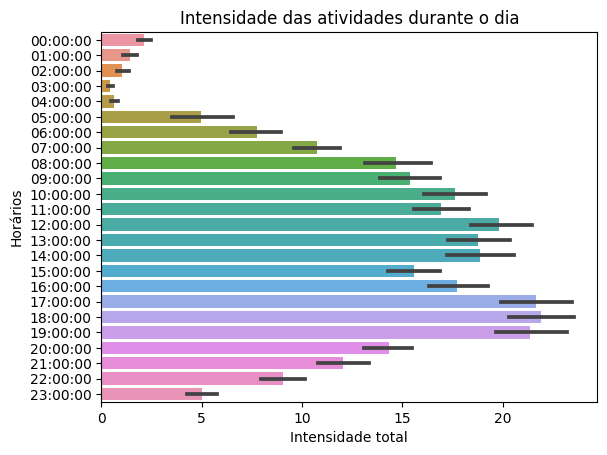

In [32]:
# Primeiro os horários de pico de atividade durante o dia
# Foi utilizado um gráfico de barras

sns.barplot(data = intensidade,
            x = 'TotalIntensity',
            y = 'hora')

plt.xlabel('Intensidade total')
plt.ylabel('Horários')
plt.title('Intensidade das atividades durante o dia')


Horários de maior intensidade de atividades, indicam bons horários para o aplicativo notificar os usuários para bater uma meta diária de 30 minutos de atividade física moderada. Na próxima visualização iremos ver a relação entre os passos dados e os minutos dormidos.

Text(0.5, 1.0, 'Minutos de sono x Passos totais')

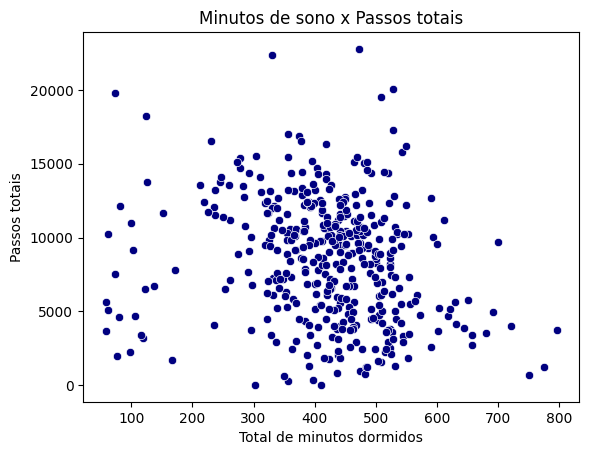

In [33]:
# Agora serão utilizados gráficos de dispersão

sns.scatterplot(data = dados_completos,
               x = 'TotalMinutesAsleep',
               y = 'TotalSteps',
               color = 'navy')

plt.xlabel('Total de minutos dormidos')
plt.ylabel('Passos totais')
plt.title('Minutos de sono x Passos totais')

É possível identificar uma relação entre a qualidade do sono e a proximidade dos 10mil passos diários.

Text(0.5, 1.0, 'Minutos sendetários x Total de minutos dormidos')

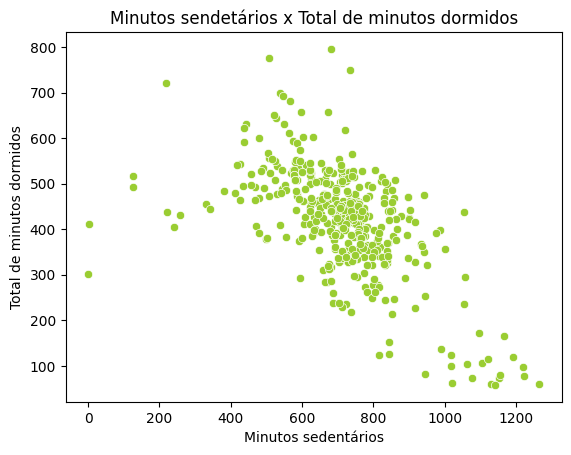

In [34]:
sns.scatterplot(data = dados_completos,
               x = 'SedentaryMinutes',
               y = 'TotalMinutesAsleep',
               color = 'yellowgreen')

plt.xlabel('Minutos sedentários')
plt.ylabel('Total de minutos dormidos')
plt.title('Minutos sendetários x Total de minutos dormidos')

Existe uma clara relação entre a baixa qualidade do sono e os minutos sedentários.

Text(0.5, 1.0, 'Total de passos x Calorias queimadas')

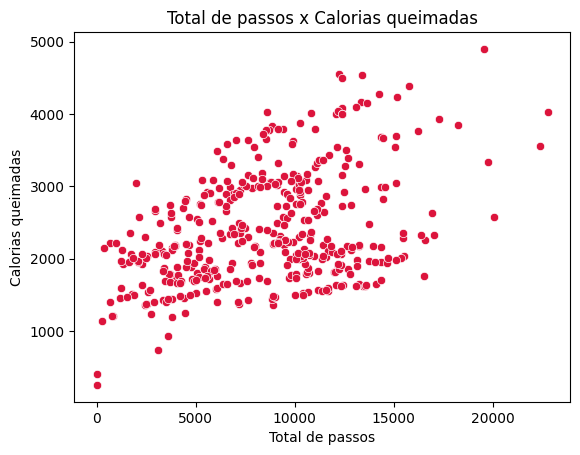

In [35]:
sns.scatterplot(data = dados_completos,
               x = 'TotalSteps',
               y = 'Calories',
               color = 'crimson')

plt.xlabel('Total de passos')
plt.ylabel('Calorias queimadas')
plt.title('Total de passos x Calorias queimadas')

Existe também uma relação entre o total de passos diários e a queima de calorias.

## Agir: entregar os insights da análise

Ao concluir a análise, chegamos a alguns insights que podem contribuir com as estratégias de marketing que podem contribuir com o aplicativo Bellabeat.

O aplicativo Bellabeat pode se tornar um companheiro da rotina de seu público alvo, ao acompanhar e oferecer orientações diárias de bem-estar e foco na saúde. Vamos a algumas medidas sugeridas:

* Em relação ao marketing: Vender o App Bellabeat como um parceiro na melhora da saúde, oferecendo acompanhamento completo de peso, atividade física, hidratação e sono. E sutilmente incentivar a compra dos produtos parte do ecossistema Bellabeat;

* O app durante o registro, e através de notifcações pode incentivar o cadastro de peso, altura e idade para traçar metas de hidratação, consumo de calorias diárias e exercícios físicos para alcançar um objetivo de medidas;

* Outra meta que pode ser traçada é a de 10.000 passos diários somados aos 30 minutos de atividade física moderada diariamente, que pode ser incentivada através também de notificação, no caso da atividade física moderada as notifcações devem ser feitas nos horários de pico anteriormente mostrados;

* O app deve monitorar o excesso de tempo sedentário, e através de notificações buscar encorajar os usuários a baixerem os momentos de sedentarismo.